In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf # to connect numpy and plotly together

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization

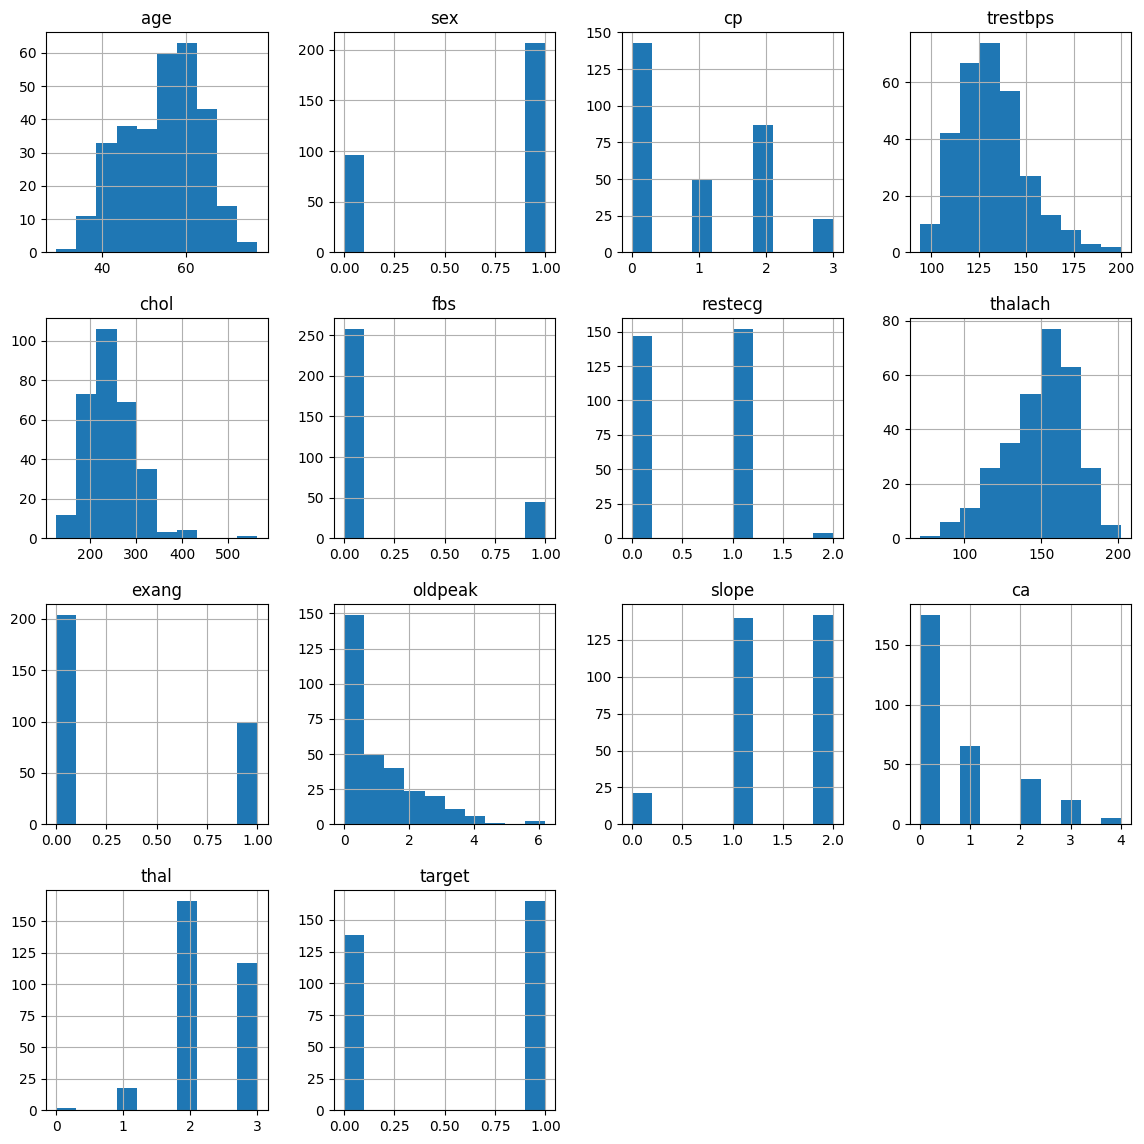

In [12]:
df.hist(figsize=(14,14))
plt.show()

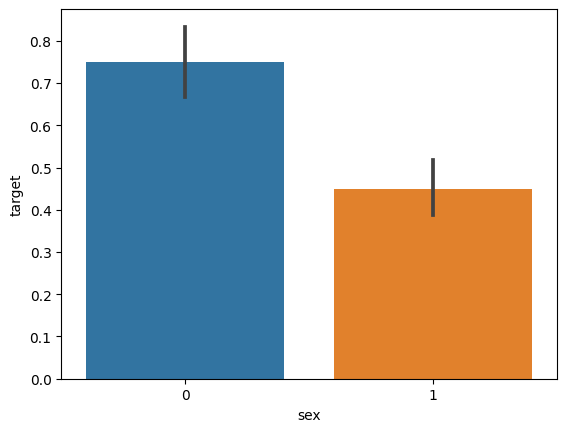

In [13]:
sns.barplot(x='sex',y='target',data = df)
plt.show()

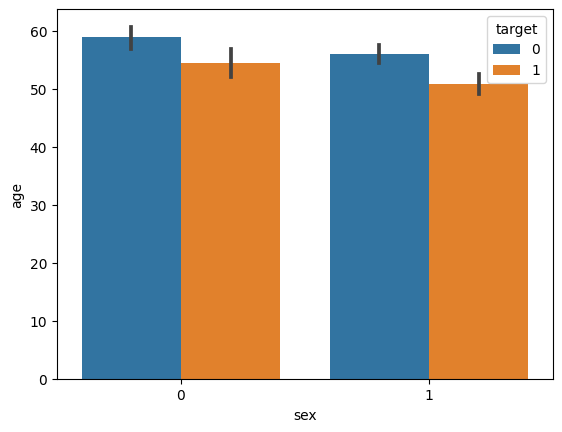

In [14]:
sns.barplot(x='sex',y='age',hue='target',data=df )
plt.show()

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
numeric_columns = ['age','trestbps','chol','thalach','oldpeak']

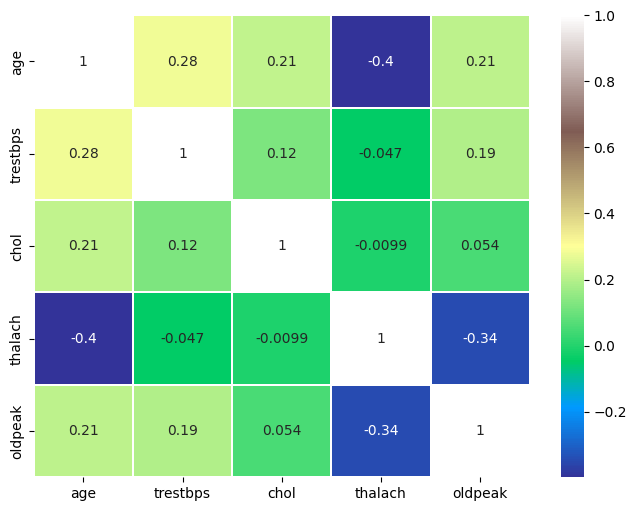

In [17]:
sns.heatmap(df[numeric_columns].corr(), annot=True,  cmap="terrain",linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

# Create for displot

c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Age of patients without Heart Disease')

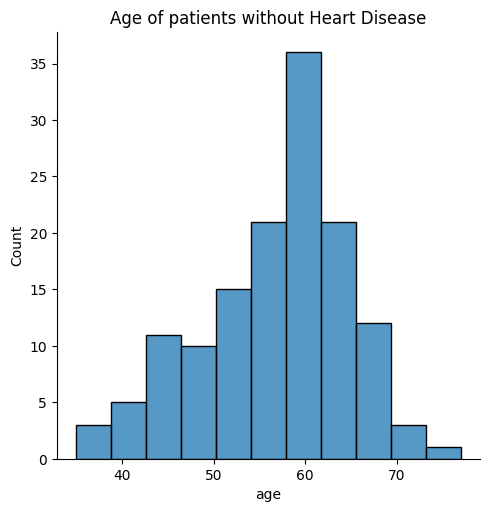

In [18]:
# plt.figure(figsize=(12, 10))
# plt.subplot(221)  
sns.displot( df[df['target'] ==0].age)
plt.title("Age of patients without Heart Disease")




c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Age of patients with Heart Disease')

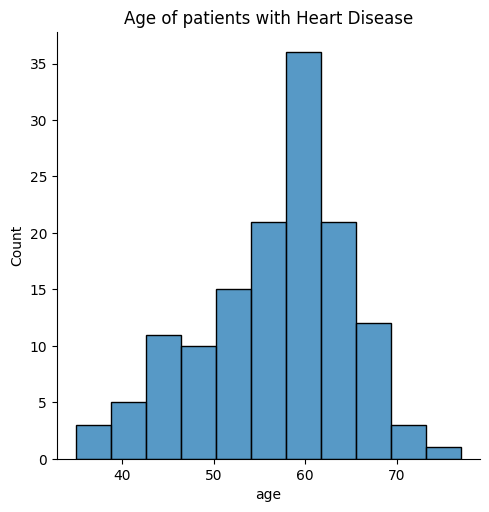

In [19]:
# plt.subplot(222)  
sns.displot( df[df['target'] ==0].age)
plt.title("Age of patients with Heart Disease")

# Data Processing

In [20]:
X = df.drop('target',axis=1)

In [21]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y = df['target']

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_x = StandardScaler().fit_transform(X)
# std_y = StandardScaler().fit_transform(y)


In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(std_x,y,test_size=0.2,random_state=42,shuffle=True)

In [26]:
X_train.shape

(242, 13)

In [27]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))


1.0


In [29]:
prediction = dt.predict(X_test)

In [30]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Accuracy

In [32]:
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test,prediction)*100

In [33]:
accuracy_dt

80.32786885245902

In [34]:
dt.feature_importances_

array([0.11647234, 0.04101489, 0.2252627 , 0.07553679, 0.08255035,
       0.01669311, 0.02861676, 0.05076572, 0.08654968, 0.10353043,
       0.027316  , 0.11847762, 0.02721362])

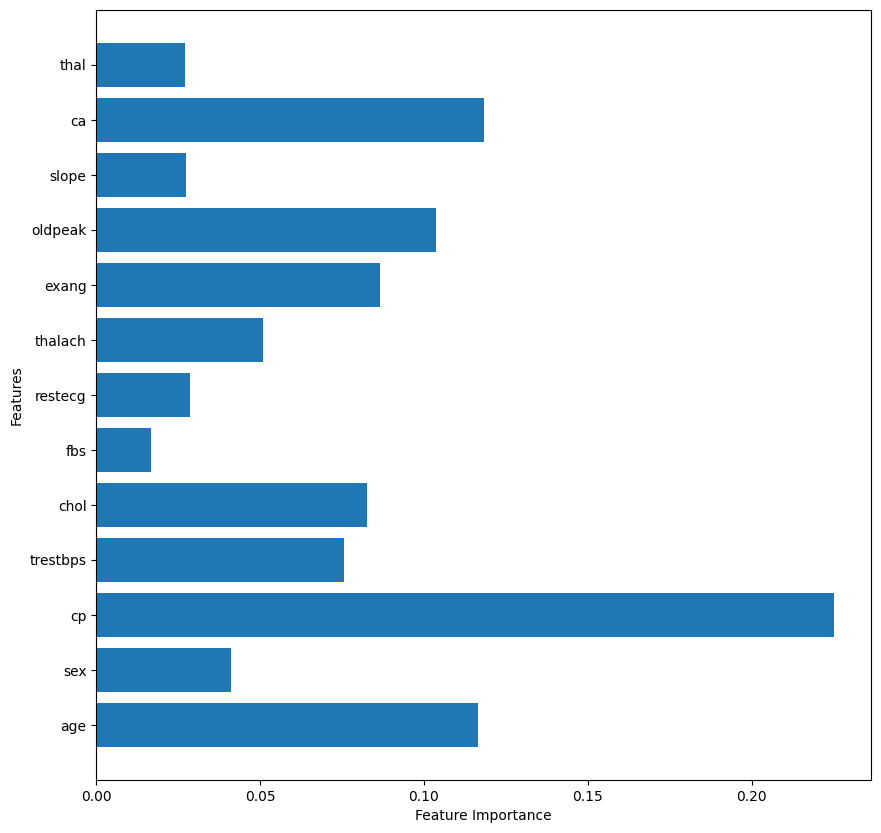

In [35]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    n_features =13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),X) # np fro 13 values and X for name of values
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importance(dt)

In [36]:
X_train

array([[-1.36386876,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.40075247,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [-0.92271345,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       ...,
       [ 1.61392956,  0.68100522,  1.97312292, ..., -0.64911323,
         0.26508221, -0.51292188],
       [-0.92271345,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [ 0.9521966 , -1.46841752,  0.03203122, ...,  0.97635214,
         1.24459328, -0.51292188]])

In [37]:
y_train[132]

1

In [38]:
custom_data = np.array([[42,1,1,120,295,0,1,162,0,0.0,2,0,2]])

In [53]:
custom_data_std = std.fit_transform(custom_data)

In [39]:
Category = ["No you Dont have a Heart Disease",'You  have a Heart Disease']

In [54]:
custom_data_predict_dt = dt.predict(custom_data_std)

In [55]:
custom_data_predict_dt

array([1], dtype=int64)

In [56]:
print(Category[int(custom_data_predict_dt)])

You  have a Heart Disease


C:\Users\samia\AppData\Local\Temp\ipykernel_14964\2995562599.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



# KNN ALGORITHMS

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9344262295081968


In [73]:
predictions_knn = knn.predict(X_test)

In [74]:
predictions_knn

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
accuracy_score_knn = accuracy_score(y_test, predictions_knn)*100

In [76]:
accuracy_score_knn

93.44262295081968

![Alt text](image.png)

In [68]:
custom_data_knn = np.array([[42,1,1,120,295,0,1,162,0,0.0,2,0,2]])

In [69]:
custom_data_std_knn = std.fit_transform(custom_data_knn)

In [70]:
custom_data_predict_knn = dt.predict(custom_data_std_knn)

In [71]:
print(Category[int(custom_data_predict_knn)])

You  have a Heart Disease


C:\Users\samia\AppData\Local\Temp\ipykernel_14964\2175201096.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [78]:
k_range = range(1,26)
score = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    score[k] = accuracy_score(y_test, predictions)
    score_list.append(accuracy_score(y_test, predictions))

In [79]:
score

{1: 0.8524590163934426,
 2: 0.819672131147541,
 3: 0.8688524590163934,
 4: 0.8852459016393442,
 5: 0.9180327868852459,
 6: 0.9344262295081968,
 7: 0.9180327868852459,
 8: 0.8524590163934426,
 9: 0.8852459016393442,
 10: 0.8852459016393442,
 11: 0.8852459016393442,
 12: 0.8688524590163934,
 13: 0.8852459016393442,
 14: 0.8688524590163934,
 15: 0.9016393442622951,
 16: 0.8852459016393442,
 17: 0.8852459016393442,
 18: 0.9016393442622951,
 19: 0.8852459016393442,
 20: 0.8852459016393442,
 21: 0.8852459016393442,
 22: 0.8852459016393442,
 23: 0.8852459016393442,
 24: 0.8852459016393442,
 25: 0.8852459016393442}

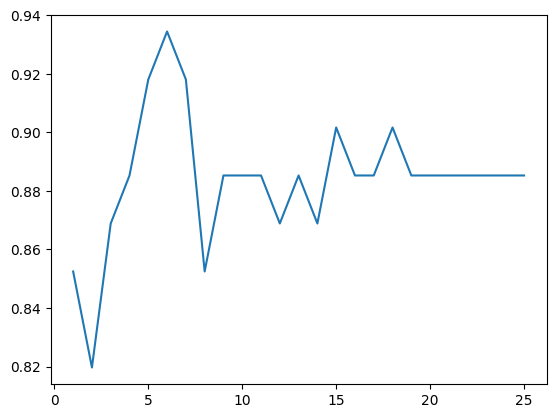

In [80]:
plt.plot(k_range,score_list)

In [81]:
px.line(x=k_range,y=score_list)